In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset (replace 'crop_data.csv' with your actual filename)
df = pd.read_csv('datafile3.csv')

In [3]:

# Feature engineering: Calculate total production and total area for each year
for year in range(2006, 2010):
    df[f'Total_Production_{year}'] = df[f'Production {year}'] * df[f'Area {year}']

In [4]:
# Extract relevant years from column names
years = [str(year) for year in range(2006, 2010)]

In [5]:
# Split data into training and testing sets
X = df[['Production ' + year for year in years] + ['Area ' + year for year in years] + ['Total_Production_' + year for year in years]]
y = df['Yield 2010']  # Change this to the relevant yield column

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [8]:
# Train a Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

In [9]:
# Evaluate models
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'RMSE (Linear Regression): {rmse_lr:.2f}')
print(f'RMSE (Random Forest): {rmse_rf:.2f}')

RMSE (Linear Regression): 24.78
RMSE (Random Forest): 22.22


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


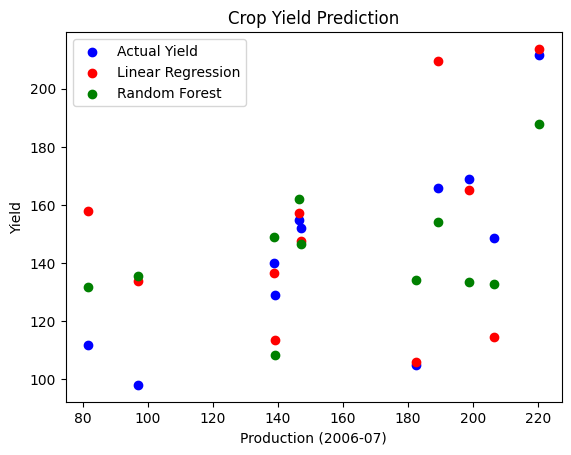

In [10]:
# Create scatter plots
plt.scatter(X_test['Production 2006'], y_test, color='blue', label='Actual Yield')
plt.scatter(X_test['Production 2006'], y_pred_lr, color='red', label='Linear Regression')
plt.scatter(X_test['Production 2006'], y_pred_rf, color='green', label='Random Forest')
plt.xlabel('Production (2006-07)')
plt.ylabel('Yield')
plt.title('Crop Yield Prediction')
plt.legend()
plt.show()

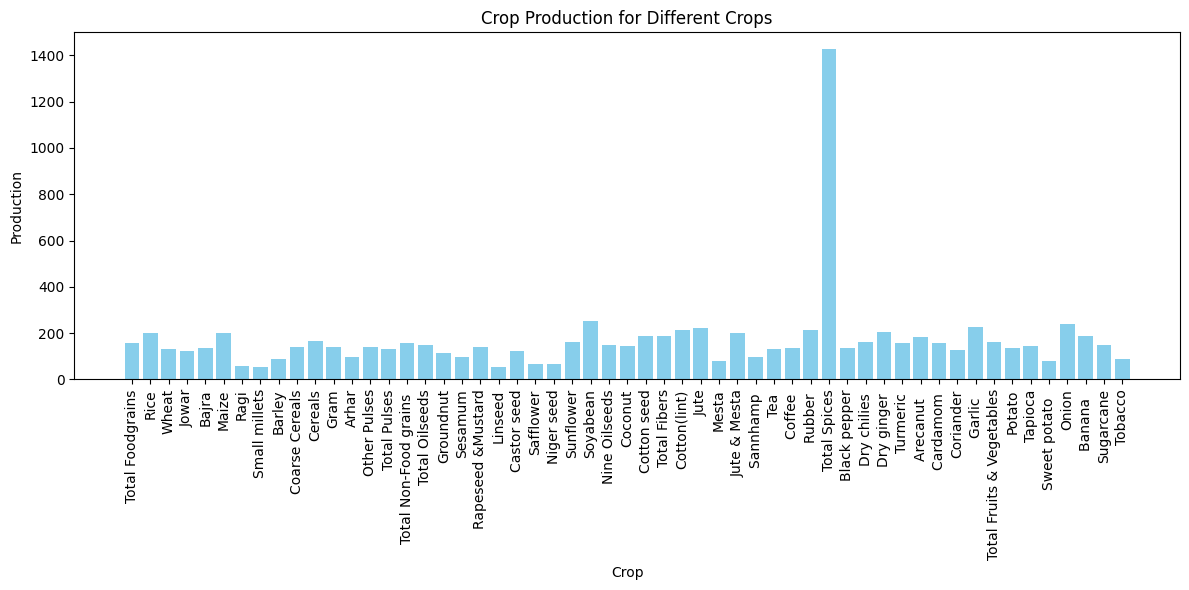

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your crop dataset (replace 'crop_data.csv' with your actual filename)
df = pd.read_csv('datafile3.csv')

# Extract crop names (assuming the crop names are in the first column)
crop_names = df.iloc[:, 0]

# Create a bar plot showing crop production for each crop
plt.figure(figsize=(12, 6))
plt.bar(crop_names, df.iloc[:, 1], color='skyblue')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.title('Crop Production for Different Crops')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyError: 0

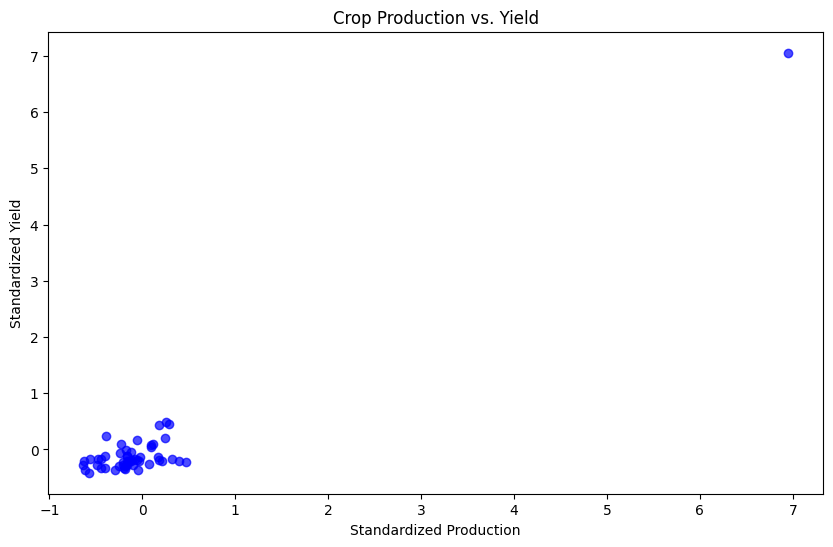

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your crop dataset (replace 'crop_data.csv' with your actual filename)
df = pd.read_csv('datafile3.csv')

# Drop 'Total Spice' feature (assuming it's an outlier)
df = df.drop([0,40])
 

# Extract crop names (assuming the crop names are in the first column)
crop_names = df.iloc[:, 0]

# Standardize scaling for production and yield
scaler = StandardScaler()
df[['Production 2006', 'Yield 2006']] = scaler.fit_transform(df[['Production 2006', 'Yield 2006']])

# Create a scatter plot showing crop production vs. yield for each crop
plt.figure(figsize=(10, 6))
plt.scatter(df['Production 2006'], df['Yield 2006'], color='blue', alpha=0.7)
plt.xlabel('Standardized Production')
plt.ylabel('Standardized Yield')
plt.title('Crop Production vs. Yield')

# Annotate each point with crop names (avoid overlapping)
for i, crop in enumerate(crop_names):
    if i % 2 == 0:
        plt.annotate(crop, (df['Production 2006'][i], df['Yield 2006'][i]), textcoords="offset points", xytext=(0, 10), ha='center')
    else:
        plt.annotate(crop, (df['Production 2006'][i], df['Yield 2006'][i]), textcoords="offset points", xytext=(0, -10), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your crop dataset (replace 'crop_data.csv' with your actual filename)
df = pd.read_csv('datafile3.csv')


# Extract crop names (assuming the crop names are in the first column)
crop_names = df.iloc[:, 0]

# Standardize scaling for area and yield
scaler = StandardScaler()
df[['Area', 'Yield']] = scaler.fit_transform(df[['Area 2009', 'Yield 2009']])

# Create a scatter plot showing crop area vs. yield for each crop
plt.figure(figsize=(10, 6))
plt.scatter(df['Area 2009'], df['Yield 2009'], color='blue', alpha=0.7)
plt.xlabel('Standardized Area')
plt.ylabel('Standardized Yield')
plt.title('Crop Area vs. Yield')
plt.tight_layout()

# Remove crop names from the plot
plt.xticks([])  # Hide x-axis labels
plt.yticks([])  # Hide y-axis labels

plt.show()
